In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import ranksums
import os

# font_dirs = ['/storage/home/hcoda1/8/zmobille3/scratch/arial']
# font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
# for font_file in font_files:
#     font_manager.fontManager.addfont(font_file)
# # font_manager.get_font_names()

# plt.rcParams['font.family']='Arial'
# plt.rcParams['font.size']=22
# plt.rcParams['axes.titlesize']=22
# plt.rcParams['xtick.labelsize']=15
# plt.rcParams['ytick.labelsize']=15

In [2]:
try:
    os.mkdir('singleNrnMI_plots')
except FileExistsError:
    pass

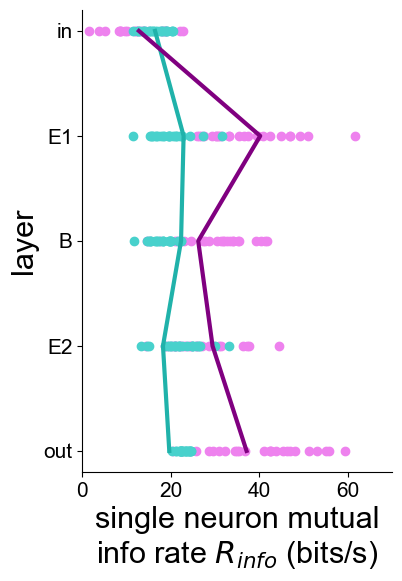

In [6]:
fig, ax = plt.subplots(figsize=(4,6))

layers = ['in','E1','B','E2','out']; numLayers = len(layers)
layerAxis = [0,1,2,3,4]
avgtmi_v_layer = np.zeros(numLayers)
avgcmi_v_layer = np.zeros(numLayers)
T = 0.05 # 50 ms
for li in reversed(range(numLayers)):
    layer = layers[-li]
    path = f'model_mutual_info2/k3/countMI_{layer}.npy'
    cmis = np.load(path)/T
    numseeds = cmis.shape[0]
    path = f'model_mutual_info2/k3/timingMI_{layer}.npy'
    tmis = np.load(path)/T
    
    avgcmi = cmis.mean(axis=1)
    avgtmi = tmis.mean(axis=1)
    avgtmi_v_layer[-li] = np.mean(tmis)
    avgcmi_v_layer[-li] = np.mean(cmis)
#     ax.plot(li*np.ones(numseeds),avgtmi,color='violet',marker='o',linestyle='')
#     ax.plot(li*np.ones(numseeds),avgcmi,color='mediumturquoise',marker='o',linestyle='')
    ax.plot(avgtmi,(numLayers-li-1)*np.ones(numseeds),color='violet',marker='o',linestyle='')
    ax.plot(avgcmi,(numLayers-li-1)*np.ones(numseeds),color='mediumturquoise',marker='o',linestyle='')
    
ax.plot(avgcmi_v_layer,list(reversed(layerAxis)),color='lightseagreen',linewidth=3)
ax.plot(avgtmi_v_layer,list(reversed(layerAxis)),color='purple',linewidth=3)
ax.set_ylabel('layer')
ax.set_xlabel('single neuron mutual\ninfo rate $R_{info}$ (bits/s)')
ax.set_yticks(layerAxis,reversed(layers))
ax.set_xlim(0,70)

sns.despine()
plt.savefig('singleNrnMI_plots/Rinfo_v_layer0p0001_vert.png',bbox_inches='tight',dpi=200)
plt.savefig('singleNrnMI_plots/Rinfo_v_layer0p0001_vert.svg',bbox_inches='tight',dpi=200)
plt.show()

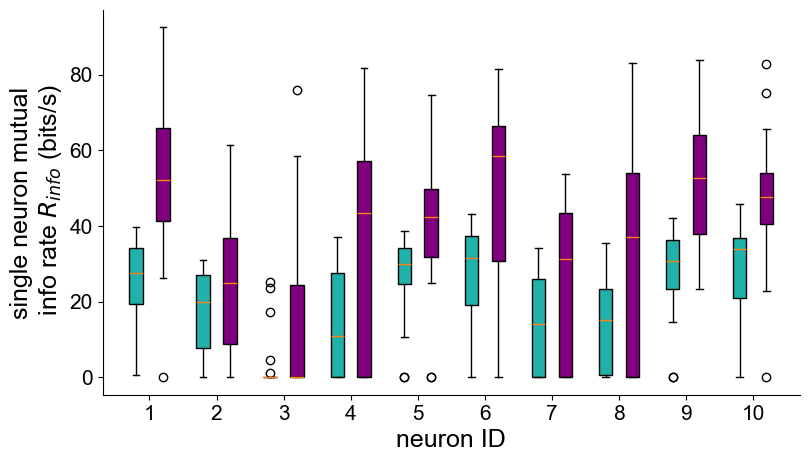

In [8]:
# muscleNames = ["LAX","LBA","LSA","LDVM","LDLM",
#     "RAX","RBA","RSA","RDVM","RDLM"]
#f'model_mutual_info/countMI_{layer}.npy'
path = 'model_mutual_info2/k3/countMI_out.npy'
all_cmis = np.load(path)/T
path = 'model_mutual_info2/k3/timingMI_out.npy'
all_tmis = np.load(path)/T

nummuscles = all_cmis.shape[1]

ccolors = ['lightseagreen' for x in range(nummuscles)]
tcolors = ['purple' for x in range(nummuscles)]

fig, ax = plt.subplots(figsize=(9,5))
cplot = ax.boxplot(all_cmis,
                  patch_artist=True,
                  positions=np.arange(0.8,nummuscles,1),
                  widths=0.2*np.ones(nummuscles))

for patch, color in zip(cplot['boxes'], ccolors):
    patch.set_facecolor(color)
    
    
tplot = ax.boxplot(all_tmis,
                  patch_artist=True,
                  positions=np.arange(1.2,nummuscles+1,1),
                  widths=0.2*np.ones(nummuscles))

for patch, color in zip(tplot['boxes'], tcolors):
    patch.set_facecolor(color)

# plt.ylim(-5,60)
# plt.yticks([0,0.5,1,1.5,2,2.5,3.])
plt.ylabel('single neuron mutual\n info rate $R_{info}$ (bits/s)',fontsize=18)
# plt.ylabel('MI (bits)')
neuron_axis = ['%s'%x for x in np.arange(1,11,1)]
plt.xticks(np.arange(1,nummuscles+1,1),neuron_axis)
plt.xlabel('neuron ID',fontsize=18)
sns.despine()
plt.savefig('singleNrnMI_plots/allNrnsOut_model_0p0001.png',bbox_inches='tight',dpi=200)
plt.savefig('singleNrnMI_plots/allNrnsOut_model_0p0001.svg',bbox_inches='tight',dpi=200)
plt.show()

3.1021906279248145e-09


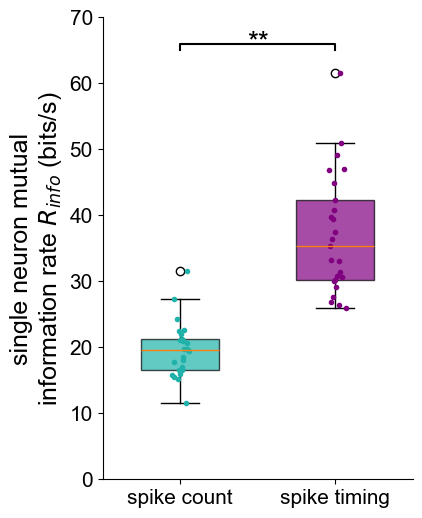

In [12]:
all_tmis_nrn_avg = np.mean(all_tmis,axis=1)
all_cmis_nrn_avg = np.mean(all_cmis,axis=1)

fig,ax = plt.subplots(figsize=(4,6))

clrs = ['lightseagreen','purple']
both_mis = [all_cmis_nrn_avg, all_tmis_nrn_avg]
bplot = plt.boxplot(both_mis, patch_artist=True, widths=0.5)
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
plt.xticks([1,2],['spike count','spike timing'])

for i in [1,2]:
    clr=clrs[i-1]
    y=both_mis[i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')

stat, pval = ranksums(both_mis[0], both_mis[1], alternative='less')
if pval < 0.05:
    p='**'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 65., 1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+3*h, p, ha='center', va='top', color=col, fontsize=20)
plt.ylim(0,70)

plt.ylabel('single neuron mutual\ninformation rate $R_{info}$ (bits/s)',fontsize=18)
sns.despine()
plt.savefig('singleNrnMI_plots/NrnAvgOutBoxplot_model_0p0001.png',bbox_inches='tight',dpi=200)
plt.savefig('singleNrnMI_plots/NrnAvgOutBoxplot_model_0p0001.svg',bbox_inches='tight',dpi=200)
plt.show()